In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
title_basics = pd.read_csv('Data/title.basics.csv')

In [3]:
title_basics.dropna(subset=['genres'],inplace=True)
genre_counts = {}
for genrelist in title_basics['genres']:
    genrelist = genrelist.split(',')
    for genre in genrelist:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [4]:
sorted_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

In [5]:
import itertools
top10 = dict(itertools.islice(sorted_genres.items(), 10)) 
top10genres = list(top10.keys())

In [6]:
top10

{'Documentary': 51640,
 'Drama': 49883,
 'Comedy': 25312,
 'Thriller': 11883,
 'Horror': 10805,
 'Action': 10335,
 'Romance': 9372,
 'Biography': 8722,
 'Crime': 6753,
 'Adventure': 6465}

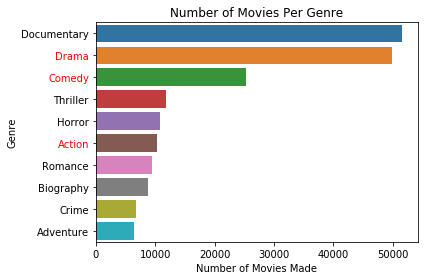

In [189]:
sns.barplot(list(top10.values()), list(top10.keys()))
plt.ylabel('Genre')
plt.xlabel('Number of Movies Made')
plt.title('Number of Movies Per Genre')
plt.tight_layout()
plt.gca().get_yticklabels()[1].set_color("red")
plt.gca().get_yticklabels()[2].set_color("red")
plt.gca().get_yticklabels()[5].set_color("red")
plt.savefig('top10genres.png')

In [287]:
len(top10.keys())

11

ValueError: 'explode' must be of length 'x'

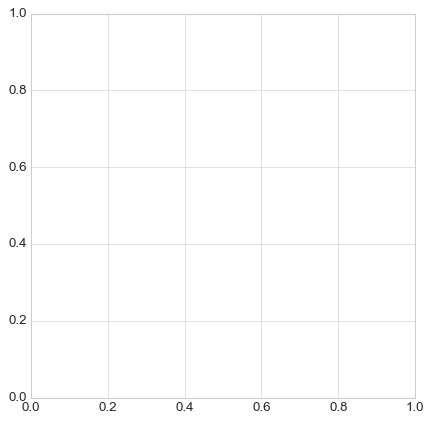

In [290]:
labels = list(top10.keys())
sizes = list(top10.values())
explode = (0, 0.1, 0.1, 0, 0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('seaborn-whitegrid')
plt.savefig('genre_comparison.png')
plt.show()

In [271]:
rt_df = pd.read_table('Data/rt.movie_info.tsv')
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [222]:
rt_df.shape

(1560, 12)

In [217]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012,"Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002,"Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006,"Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010,"Nov 9, 2010",$,134904,117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010,"Apr 5, 2011",$,1039869,108 minutes,ATO Pictures


In [9]:
rt_df = rt_df.dropna(subset=['genre','dvd_date','box_office'])

In [10]:
def to_year_only(entry):
    return str(entry)[-4:]

def to_int_only(entry):
    return int(entry.replace(',',''))

In [11]:
rt_df['theater_date'] = [to_year_only(d) for d in rt_df.theater_date]

In [12]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002,"Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006,"Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010,"Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010,"Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures


In [13]:
rt_df['box_office'] = [to_int_only(c) for c in rt_df.box_office]

In [218]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012,"Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002,"Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006,"Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010,"Nov 9, 2010",$,134904,117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010,"Apr 5, 2011",$,1039869,108 minutes,ATO Pictures


In [219]:
rt_df.shape

(334, 12)

In [15]:
def gross_per_year(df):
    gross_info = {}
    years = sorted(list(df.theater_date.unique()))
    for year in years:
        year_group = df[df['theater_date']==year]
        total = sum(year_group.box_office)
        gross_info[str(year)] = total
    return gross_info

In [16]:
genre_gross_info = {}
for genre in top10genres:
    genre_df = rt_df[rt_df['genre'].str.contains(genre)]
    genre_gross_info[str(genre)] = gross_per_year(genre_df)

In [201]:
genre_gross_info

{'Documentary': {'2002': 64209101,
  '2003': 16443233,
  '2007': 598103,
  '2009': 73614405,
  '2010': 21930339,
  '2011': 410077,
  '2012': 104286,
  '2013': 419361,
  '2017': 118253},
 'Drama': {'1958': 109257,
  '1974': 8300,
  '1985': 33200000,
  '1990': 119000000,
  '1992': 32000000,
  '1998': 2365931,
  '2000': 187320284,
  '2001': 197000602,
  '2002': 261391943,
  '2003': 590714367,
  '2004': 758246634,
  '2005': 330836419,
  '2006': 483557587,
  '2007': 216501576,
  '2008': 610385977,
  '2009': 377783505,
  '2010': 240250223,
  '2011': 491491634,
  '2012': 21937607,
  '2013': 163455972,
  '2014': 69551399,
  '2015': 115369064,
  '2016': 113081351,
  '2017': 184235449,
  '2018': 35003216},
 'Comedy': {'1974': 8300,
  '1998': 2365931,
  '2000': 287077967,
  '2001': 209770163,
  '2002': 550137311,
  '2003': 307148317,
  '2004': 517101721,
  '2005': 357206764,
  '2006': 581383066,
  '2007': 462289492,
  '2008': 430170409,
  '2009': 402981383,
  '2010': 181958088,
  '2011': 33721238

In [17]:
genre_total_gross_info = {}
for genre in genre_gross_info:
    genre_total_gross_info[genre] = sum(genre_gross_info[genre].values())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

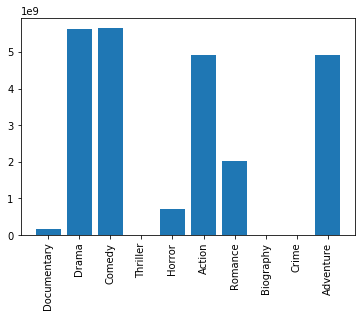

In [18]:
plt.bar(genre_total_gross_info.keys(),genre_total_gross_info.values())
plt.xticks(rotation=90)

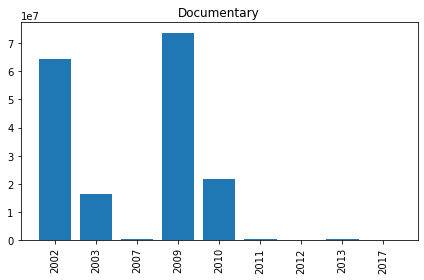

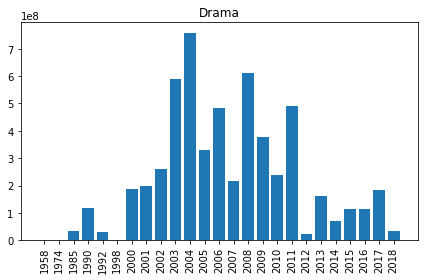

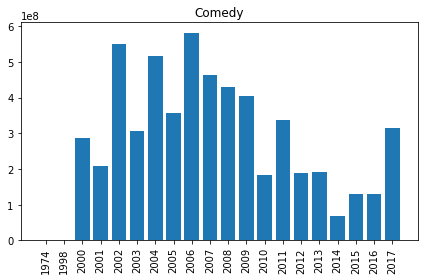

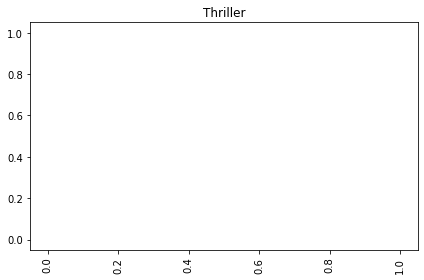

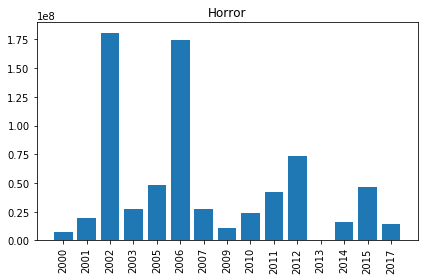

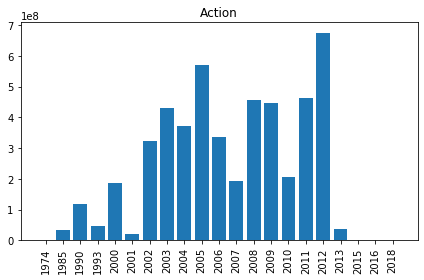

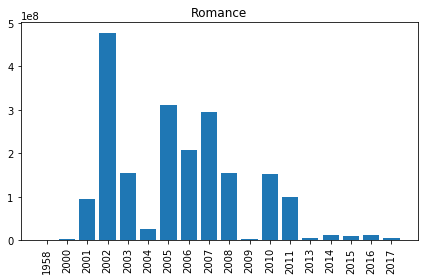

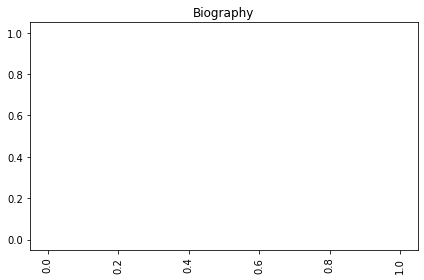

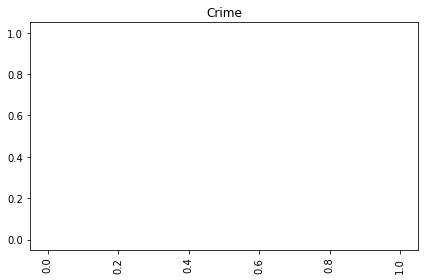

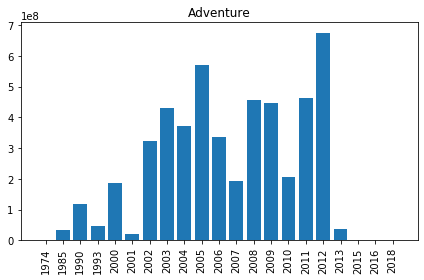

In [213]:
for genre in genre_gross_info:
    plt.bar(genre_gross_info[genre].keys(),
            genre_gross_info[genre].values())
    plt.title(genre)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [212]:
genre_gross_info

{'Documentary': {'2002': 64209101,
  '2003': 16443233,
  '2007': 598103,
  '2009': 73614405,
  '2010': 21930339,
  '2011': 410077,
  '2012': 104286,
  '2013': 419361,
  '2017': 118253},
 'Drama': {'1958': 109257,
  '1974': 8300,
  '1985': 33200000,
  '1990': 119000000,
  '1992': 32000000,
  '1998': 2365931,
  '2000': 187320284,
  '2001': 197000602,
  '2002': 261391943,
  '2003': 590714367,
  '2004': 758246634,
  '2005': 330836419,
  '2006': 483557587,
  '2007': 216501576,
  '2008': 610385977,
  '2009': 377783505,
  '2010': 240250223,
  '2011': 491491634,
  '2012': 21937607,
  '2013': 163455972,
  '2014': 69551399,
  '2015': 115369064,
  '2016': 113081351,
  '2017': 184235449,
  '2018': 35003216},
 'Comedy': {'1974': 8300,
  '1998': 2365931,
  '2000': 287077967,
  '2001': 209770163,
  '2002': 550137311,
  '2003': 307148317,
  '2004': 517101721,
  '2005': 357206764,
  '2006': 581383066,
  '2007': 462289492,
  '2008': 430170409,
  '2009': 402981383,
  '2010': 181958088,
  '2011': 33721238

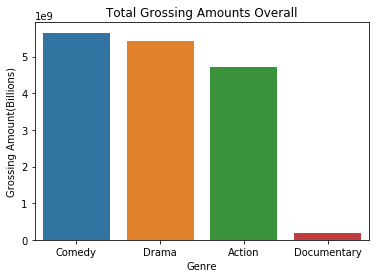

In [216]:
topgenres_and_doc = ['Comedy', 'Drama', 'Action', 'Documentary']
genre_decade_grossings = {'Comedy': 0, 'Drama': 0, 'Action': 0, 'Documentary': 0}
for genre in topgenres_and_doc:
    for year in genre_gross_info[genre]:
        if int(year)>1999 and int(year)<2018:
            genre_decade_grossings[genre] += genre_gross_info[genre][year]
            
sns.barplot(list(genre_decade_grossings.keys()), list(genre_decade_grossings.values()))
plt.title('Total Grossing Amounts Overall')
plt.xlabel('Genre')
plt.ylabel('Grossing Amount(Billions)')
plt.savefig('genregrosstotals.png')
plt.show()

In [18]:
top3 = ['Comedy', 'Adventure', 'Action']

In [250]:
comedy_gross = genre_gross_info['Comedy']
adventure_gross = genre_gross_info['Adventure']
drama_gross = genre_gross_info['Drama']
years = []

for genre in top3:
    genre_years = list(genre_gross_info[str(genre)].keys())
    for year in genre_years:
        if year not in years:
            years.append(year)

In [19]:
comedy_df = rt_df[rt_df['genre'].str.contains('Comedy')] 

In [94]:
action_df = rt_df[rt_df['genre'].str.contains('Action')]

In [36]:
drama_df = rt_df[rt_df['genre'].str.contains('Drama')]

In [52]:
def top5_studios_in_genre(df):
    studio_info = {}
    studios = list(df.studio.unique())
    for studio in studios:
        studio_group = df[df['studio']==studio]
        total=sum(studio_group.box_office)
        studio_info[studio]=total
    sorted_studios = {s: g for s, g in sorted(studio_info.items(), key=lambda item: item[1],reverse=True)}
    top5 = dict(itertools.islice(sorted_studios.items(), 5))
    return top5

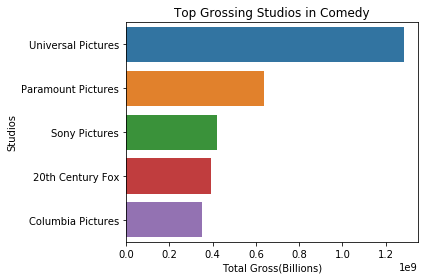

In [72]:
comedy = top5_studios_in_genre(comedy_df)
plt.title('Top Grossing Studios in Comedy')
sns.barplot(list(comedy.values()),list(comedy.keys()))
plt.xlabel('Total Gross(Billions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('comedy.png')
plt.show()

In [54]:
comedy

{'Universal Pictures': 1283333091,
 'Paramount Pictures': 639528024,
 'Sony Pictures': 422157773,
 '20th Century Fox': 394394751,
 'Columbia Pictures': 351167320}

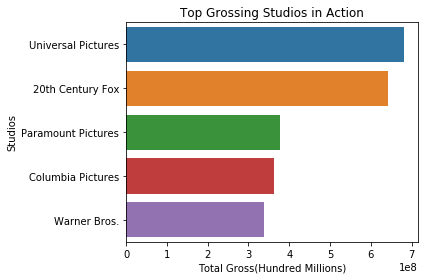

In [96]:
action = top5_studios_in_genre(action_df)
plt.title('Top Grossing Studios in Action')
sns.barplot(list(adventure.values()),list(adventure.keys()))
plt.xlabel('Total Gross(Hundred Millions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('action.png')
plt.show()

In [93]:
adventure

{'Universal Pictures': 680609794,
 '20th Century Fox': 642693806,
 'Paramount Pictures': 376705578,
 'Columbia Pictures': 363348873,
 'Warner Bros.': 337601229}

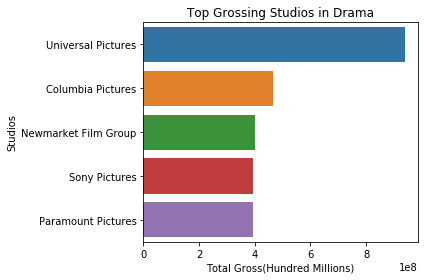

In [91]:
drama = top5_studios_in_genre(drama_df)
plt.title('Top Grossing Studios in Drama')
sns.barplot(list(action.values()),list(action.keys()))
plt.xlabel('Total Gross(Hundred Millions)')
plt.ylabel('Studios')
plt.tight_layout()
plt.savefig('drama.png')
plt.show()

In [92]:
drama

{'Universal Pictures': 938177131,
 'Columbia Pictures': 466720150,
 'Newmarket Film Group': 402187787,
 'Sony Pictures': 393779674,
 'Paramount Pictures': 393746723}

In [58]:
action

{'Universal Pictures': 938177131,
 'Columbia Pictures': 466720150,
 'Newmarket Film Group': 402187787,
 'Sony Pictures': 393779674,
 'Paramount Pictures': 393746723}

In [52]:
bom = pd.read_csv('Data/bom.movie_gross.csv')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [53]:
bom.dropna(subset=['domestic_gross'],inplace=True)

In [54]:
bom.shape

(3359, 5)

In [55]:
def to_float(entry):
    try:
        if ',' in entry:
            entry = entry.replace(',','')
            entry = float(entry)
        else:
            entry = float(entry)
        return entry
    except:
        return 0

bom['foreign_gross'] = [to_float(e) for e in bom.foreign_gross]
bom.dropna(subset=['domestic_gross'])
bom.shape

(3359, 5)

In [223]:
bom_studios = ['BV', 'Uni.', 'Fox', 'Sony', 'WB', 'Par.']

bom_studios_info = {}
for studio in bom_studios:
    df = bom[bom['studio'] == studio]
    years = (bom.year.unique())
    bom_gross_info = {}
    for year in years:
        year_df = df[df['year']==year]
        domestic_gross = sum(year_df.domestic_gross)
        foreign_gross = sum(year_df.foreign_gross)
        bom_gross_info[str(year)] = {'domestic':domestic_gross,'foreign':foreign_gross}
    bom_studios_info[str(studio)] = bom_gross_info

In [224]:
bom_studios_info

{'BV': {'2010': {'domestic': 1519129200.0, 'foreign': 2652041200.0},
  '2011': {'domestic': 1197500000.0, 'foreign': 1969300000.0},
  '2012': {'domestic': 1575900000.0, 'foreign': 2026200000.0},
  '2013': {'domestic': 1816400000.0, 'foreign': 3233199999.0},
  '2014': {'domestic': 1519600000.0, 'foreign': 2401300000.0},
  '2015': {'domestic': 2495699999.0, 'foreign': 2550112131.6},
  '2016': {'domestic': 2871000000.0, 'foreign': 4393300000.0},
  '2017': {'domestic': 2378200000.0, 'foreign': 3946600000.0},
  '2018': {'domestic': 3045600000.0, 'foreign': 2621801369.5}},
 'Uni.': {'2010': {'domestic': 872900000.0, 'foreign': 1028197000.0},
  '2011': {'domestic': 977600000.0, 'foreign': 1251200000.0},
  '2012': {'domestic': 1427400000.0, 'foreign': 1833999999.0},
  '2013': {'domestic': 1468100000.0, 'foreign': 2029900000.0},
  '2014': {'domestic': 1029800000.0, 'foreign': 1097800000.0},
  '2015': {'domestic': 2429738000.0, 'foreign': 2029051182.4},
  '2016': {'domestic': 1453400000.0, 'fore

In [228]:
top3 = ['BV', 'Uni.', 'Fox']
top3_gross_dict = {}
for studio in top3:
    top3_gross_dict[studio] = {'domestic':[], 'foreign':[]}
    for year in bom_studios_info[studio]:
        information = bom_studios_info[studio][year]
        top3_gross_dict[studio]['domestic'].append(information['domestic'])
        top3_gross_dict[studio]['foreign'].append(information['foreign'])

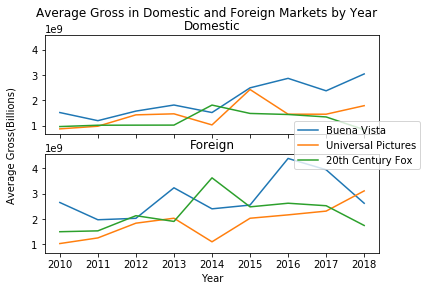

In [234]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True)
xlabels = list(range(2009,2019))
for studio in top3_gross_dict:
    ax1.plot(top3_gross_dict[studio]['domestic'])
    ax2.plot(top3_gross_dict[studio]['foreign'])
    
    
ax2.set_xticklabels(xlabels)
fig.legend(['Buena Vista','Universal Pictures', '20th Century Fox'], loc='center right')
fig.suptitle('Average Gross in Domestic and Foreign Markets by Year')
ax1.set_title('Domestic')
ax2.set_title('Foreign')
ax2.set_xlabel('Year')
fig.text(0.05,0.5, "Average Gross(Billions)", ha="center", va="center", rotation=90)
plt.tight_layout
plt.savefig('studiogross.png')
plt.show()

In [227]:
domestic_averages = {}
foreign_averages = {}
for s in bom_studios_info:
    domestic_total = 0
    foreign_total = 0
    n = len(bom_studios_info[s])
    for y in bom_studios_info[s].keys():
        domestic_total += bom_studios_info[s][y]['domestic']
        foreign_total += bom_studios_info[s][y]['foreign']
    domestic_averages[s] = domestic_total/n
    foreign_averages[s] = foreign_total/n
print(domestic_averages, "\n",foreign_averages)

{'BV': 2046558799.8888888, 'Uni.': 1433599222.2222223, 'Fox': 1216611110.7777777, 'Sony': 939964788.6666666, 'WB': 1352005111.1111112, 'Par.': 853985633.2222222} 
 {'BV': 2865983855.5666666, 'Uni.': 1872752354.6, 'Fox': 2228429622.111111, 'Sony': 1549470666.4444444, 'WB': 2074211444.2222223, 'Par.': 1318153888.6666667}


In [63]:
bom_studios_info

{'Uni.': {'2010': {'domestic': 872900000.0, 'foreign': 1028197000.0},
  '2011': {'domestic': 977600000.0, 'foreign': 1251200000.0},
  '2012': {'domestic': 1427400000.0, 'foreign': 1833999999.0},
  '2013': {'domestic': 1468100000.0, 'foreign': 2029900000.0},
  '2014': {'domestic': 1029800000.0, 'foreign': 1097800000.0},
  '2015': {'domestic': 2429738000.0, 'foreign': 2029051182.4},
  '2016': {'domestic': 1453400000.0, 'foreign': 2162722000.0},
  '2017': {'domestic': 1453000000.0, 'foreign': 2311301010.0},
  '2018': {'domestic': 1790455000.0, 'foreign': 3110600000.0}},
 'P/DW': {'2010': {'domestic': 677700000.0, 'foreign': 978500000.0},
  '2011': {'domestic': 666900000.0, 'foreign': 1677500000.0},
  '2012': {'domestic': 338300000.0, 'foreign': 737600000.0},
  '2013': {'domestic': 0, 'foreign': 0},
  '2014': {'domestic': 0, 'foreign': 0},
  '2015': {'domestic': 0, 'foreign': 0},
  '2016': {'domestic': 0, 'foreign': 0},
  '2017': {'domestic': 0, 'foreign': 0},
  '2018': {'domestic': 0, 'fo